--- Iniciando Auditoría de Predicciones ---

1. Comparativa Estadística:
       Realidad (Train)  Predicción (Test)
count           7000.00            2000.00
mean            3266.43            3266.43
std              579.92             580.02
min              227.00             437.70
25%             2960.00            2979.94
50%             3305.00            3346.83
75%             3629.00            3643.44
max             5585.00            4993.67

>> Desviación de la Media: 0.00g
   ✅ OK: La media es consistente.

>> Gráfico guardado como 'distribution_check.png'

2. Análisis de Extremos:
   Mínimo predicho: 437.70g
   Máximo predicho: 4993.67g

--- Conclusión del Análisis ---
Si las curvas se solapan bien y no hay alertas críticas,
tu modelo es estadísticamente coherente y probablemente robusto.


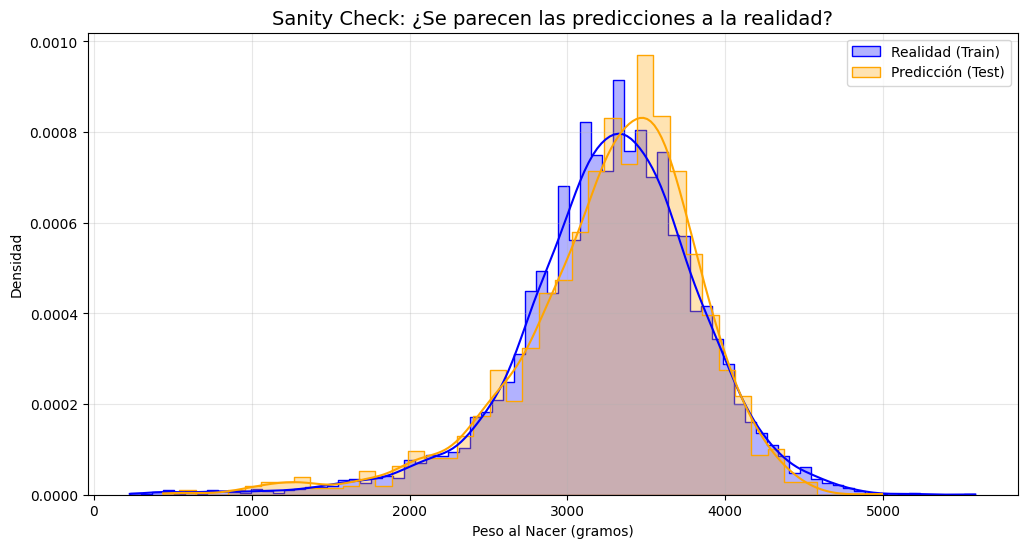

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

def analyze_results():
    print("--- Iniciando Auditoría de Predicciones ---")

    # 1. Cargar Datos Reales (Train) y Predicciones (Submission)
    try:
        train_df = pd.read_csv('train.csv')
        submission_df = pd.read_csv('final_submission_geometric.csv')
    except FileNotFoundError:
        print("Error: Asegúrate de tener 'train.csv' y 'final_submission_geometric.csv' en la misma carpeta.")
        return

    target = 'DBWT'
    preds = submission_df[target]
    real = train_df[target]

    # 2. Estadísticas Descriptivas
    # Según el libro, la media y desviación típica de Test deberían ser similares a Train
    # asumiendo que el dataset fue dividido aleatoriamente (IID assumption).

    stats = pd.DataFrame({
        'Realidad (Train)': real.describe(),
        'Predicción (Test)': preds.describe()
    })

    print("\n1. Comparativa Estadística:")
    print(stats.round(2))

    diff_mean = preds.mean() - real.mean()
    print(f"\n>> Desviación de la Media: {diff_mean:.2f}g")
    if abs(diff_mean) > 100:
        print("   ⚠️ ALERTA: La media de predicción difiere significativamente de la histórica.")
        print("   Posible causa: Sesgo en el modelo o cambio en la población del Test.")
    else:
        print("   ✅ OK: La media es consistente.")

    # 3. Visualización de Distribuciones
    plt.figure(figsize=(12, 6))

    # Histograma y KDE
    sns.histplot(real, color="blue", label="Realidad (Train)", kde=True, stat="density", alpha=0.3, element="step")
    sns.histplot(preds, color="orange", label="Predicción (Test)", kde=True, stat="density", alpha=0.3, element="step")

    plt.title('Sanity Check: ¿Se parecen las predicciones a la realidad?', fontsize=14)
    plt.xlabel('Peso al Nacer (gramos)')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Guardar gráfico para revisión
    plt.savefig('distribution_check.png')
    print("\n>> Gráfico guardado como 'distribution_check.png'")

    # 4. Análisis de Extremos (Outliers)
    # User Guide: Pesos < 1000g son muy raros pero posibles. < 0g es imposible.
    min_pred = preds.min()
    max_pred = preds.max()

    print(f"\n2. Análisis de Extremos:")
    print(f"   Mínimo predicho: {min_pred:.2f}g")
    print(f"   Máximo predicho: {max_pred:.2f}g")

    if min_pred < 200:
         print("   ⚠️ ALERTA CRÍTICA: Hay predicciones de peso inverosímiles (< 200g).")

    # Conclusión
    print("\n--- Conclusión del Análisis ---")
    print("Si las curvas se solapan bien y no hay alertas críticas,")
    print("tu modelo es estadísticamente coherente y probablemente robusto.")

if __name__ == "__main__":
    analyze_results()